# *Exercises*

1. Using the code example for plotting the PDF on page 127, plot the cdf and quantile function.
    - We have 40'000 visitors and we get 300 subscribers out of them
    - Beta(x; 300, 39700)

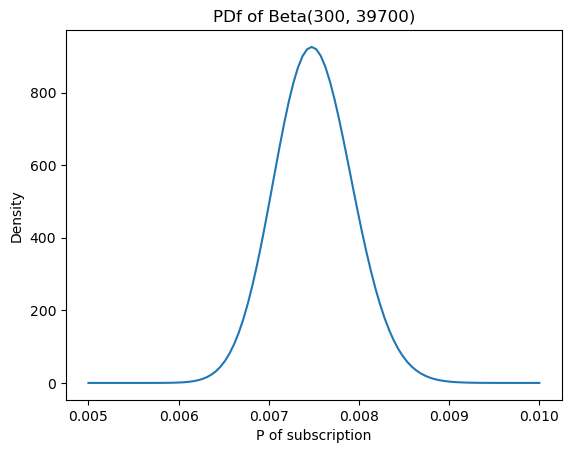

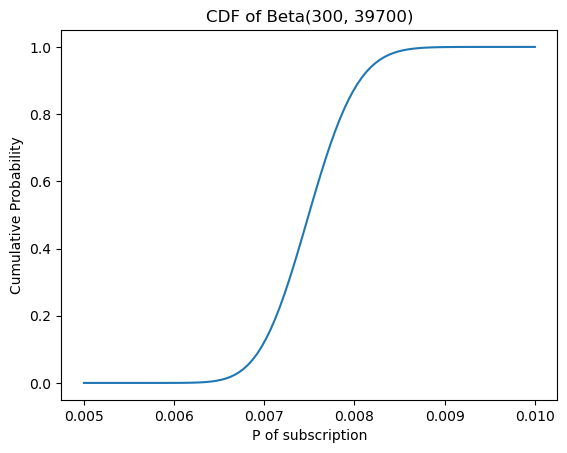

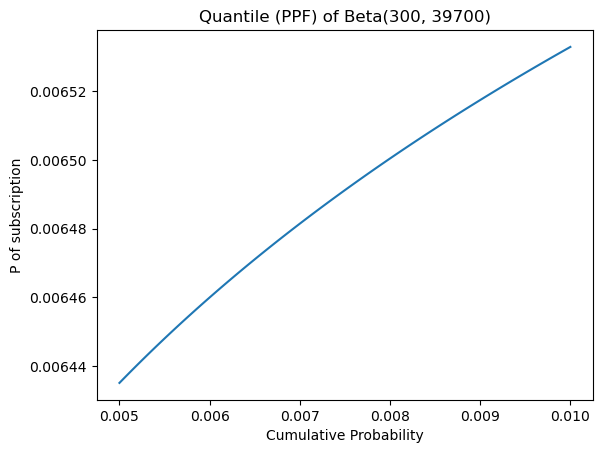

In [18]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

alpha_ = 300
beta_ = 39700
x = np.linspace(0.005, 0.01, 100)
beta_distribution = beta.pdf(x, alpha_, beta_)

plt.plot(x, beta_distribution)
plt.title('PDf of Beta(300, 39700)')
plt.xlabel('P of subscription')
plt.ylabel('Density')
plt.show()

# CDF - tells us the P of everything up to x
beta_cdf = beta.cdf(x, alpha_, beta_)
plt.clf()
plt.plot(x, beta_cdf)
plt.title('CDF of Beta(300, 39700)')
plt.xlabel('P of subscription')
plt.ylabel('Cumulative Probability')
plt.show()

# Quantile - tells us if we want to know what values are in what quantile. For example a ppf of 0.5 would give us the median.
beta_ppf = beta.ppf(x, alpha_, beta_)
plt.clf()
plt.plot(x, beta_ppf)
plt.title('Quantile (PPF) of Beta(300, 39700)')
plt.ylabel('P of subscription')
plt.xlabel('Cumulative Probability')
plt.show()

2. Returning to the task of measuring snowfall from Chapter 10. You have the following measures, what is your 99.9% confidence interval?
    - [7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4]

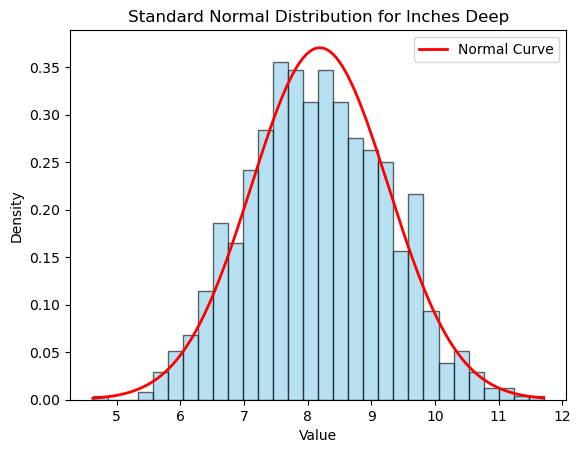

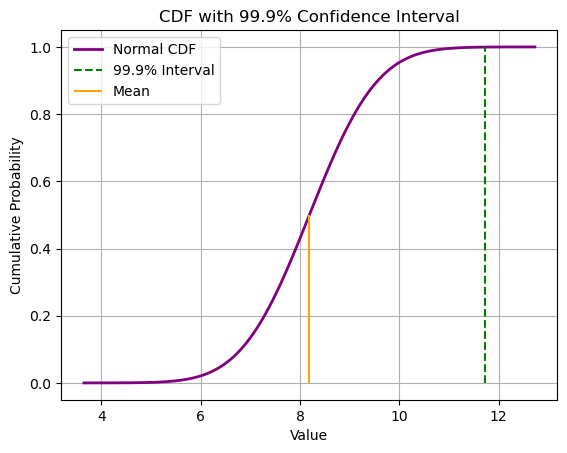

The lower is 5.0 and the upper is 12.0 for the 99.9% confidence interval


In [73]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

values = [7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4]
mean = np.mean(values)
std = np.std(values)

dist = norm(loc=mean, scale=std)
samples = dist.rvs(1000)

# Plot histogram
plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Create x values for the curve
x = np.linspace(min(samples), max(samples), 1000)

# Get the PDF values from the distribution
pdf = dist.pdf(x)

# Plot the normal distribution curve
plt.plot(x, pdf, color='red', linewidth=2, label='Normal Curve')

# Add labels and legend
plt.title("Standard Normal Distribution for Inches Deep")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

#CDF with intervals
lower, upper = dist.interval(0.999)

x_cdf = np.linspace(lower - 1, upper + 1, 1000)  # widen the range
cdf = dist.cdf(x_cdf)

plt.plot(x_cdf, cdf, color='purple', linewidth=2, label='Normal CDF')

# Plot both bounds clearly
plt.vlines([lower, upper], ymin=0, ymax=dist.cdf([lower, upper]),
           colors='green', linestyles='dashed', label='99.9% Interval')

plt.vlines(mean, ymin=0, ymax=dist.cdf(mean),
           colors='orange', linestyles='solid', label='Mean')

plt.title("CDF with 99.9% Confidence Interval")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()

print(f'The lower is {np.round(lower)} and the upper is {np.round(upper)} for the 99.9% confidence interval')


3. A child is going door to door to sell candy bars. So far she has visited 30 houses and sold 10. She will visit 40 more houses. What is the 95% confidence interval for the rest of the day?
    - Beta(10, 20)
    

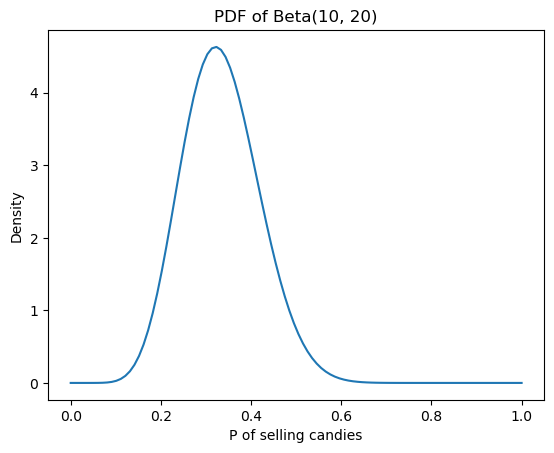

TypeError: _parse_args() missing 2 required positional arguments: 'a' and 'b'

In [63]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

alpha_ = 10
beta_ = 20
x = np.linspace(0, 1, 100)

beta_distribution = beta.pdf(x, alpha_, beta_)

# Beta pdf plot
plt.plot(x, beta_distribution)
plt.title('PDF of Beta(10, 20)')
plt.xlabel('P of selling candies')
plt.ylabel('Density')
plt.show()

# confidence interval of 95%
lower, upper = beta.interval(0.95, alpha_, beta_)

# cdf
x_cdf = np.linspace(lower - 1, upper + 1, 1000)  # widen the range
cdf = beta.cdf(x_cdf)

plt.plot(x_cdf, cdf, color='purple', linewidth=2, label='Normal CDF')

# Plot both bounds clearly
plt.vlines([lower, upper], ymin=0, ymax=dist.cdf([lower, upper]),
           colors='green', linestyles='dashed', label='99.9% Interval')

plt.vlines(mean, ymin=0, ymax=dist.cdf(mean),
           colors='orange', linestyles='solid', label='Mean')

plt.title("CDF with 99.9% Confidence Interval")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()
print(f'She will sell between {np.round(lower*40)} and {np.round(upper*40)}')